# How did average assignment GPA of each race group, on assignments due per week, change over the semester?

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args


sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

# load students
f = open('/home/jenny/remote_learning_code_Spring_2017-2020/user_id_groups.pkl', 'rb')
user = pickle.load(f)
students = user['student']

In [3]:
# load submission
submission = pd.read_csv(args.submissions, sep='\t', header=0)
submission = submission.loc[submission['user_id'].isin(students)]
submission['submitted_at'] = pd.to_datetime(submission['submitted_at'], format='%Y-%m-%d %H:%M:%S.%f')
submission = submission.loc[(submission['created_at'].notnull())&(submission['created_at']>=start_date_20)&(submission['created_at']<=end_date_20), ['user_id', 'assignment_id', 'submitted_at', 'published_score']] # no duplicate exists
submission = submission.loc[(submission['submitted_at'].notnull())&(submission['submitted_at']>=start_date_20)&(submission['submitted_at']<=end_date_20)&(submission['published_score'].notnull())&(submission['published_score']>0)]
submission['submitted_at'] = submission['submitted_at'].apply(lambda x: x.date())
submission['submitted_at_week'] = submission['submitted_at'].apply(lambda x: x.isocalendar()[1])
min_week = min(submission['submitted_at_week'].tolist())
submission['submitted_at_week'] = submission['submitted_at_week'] - min_week+1

# load assignments
assignments = pd.read_csv(args.assignments, sep='\t', header=0)
assignments = assignments.loc[:, ['assignment_id', 'points_possible']]  # no duplicate exists
# merge assignments and submission to match scores with total points
submission = pd.merge(submission, assignments, on='assignment_id', how='inner')
submission = submission.loc[(submission['points_possible'].notnull())&(submission['points_possible']>0)&(submission['published_score']<=submission['points_possible'])]
submission['score'] = submission['published_score'] / submission['points_possible']
#print(submission)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


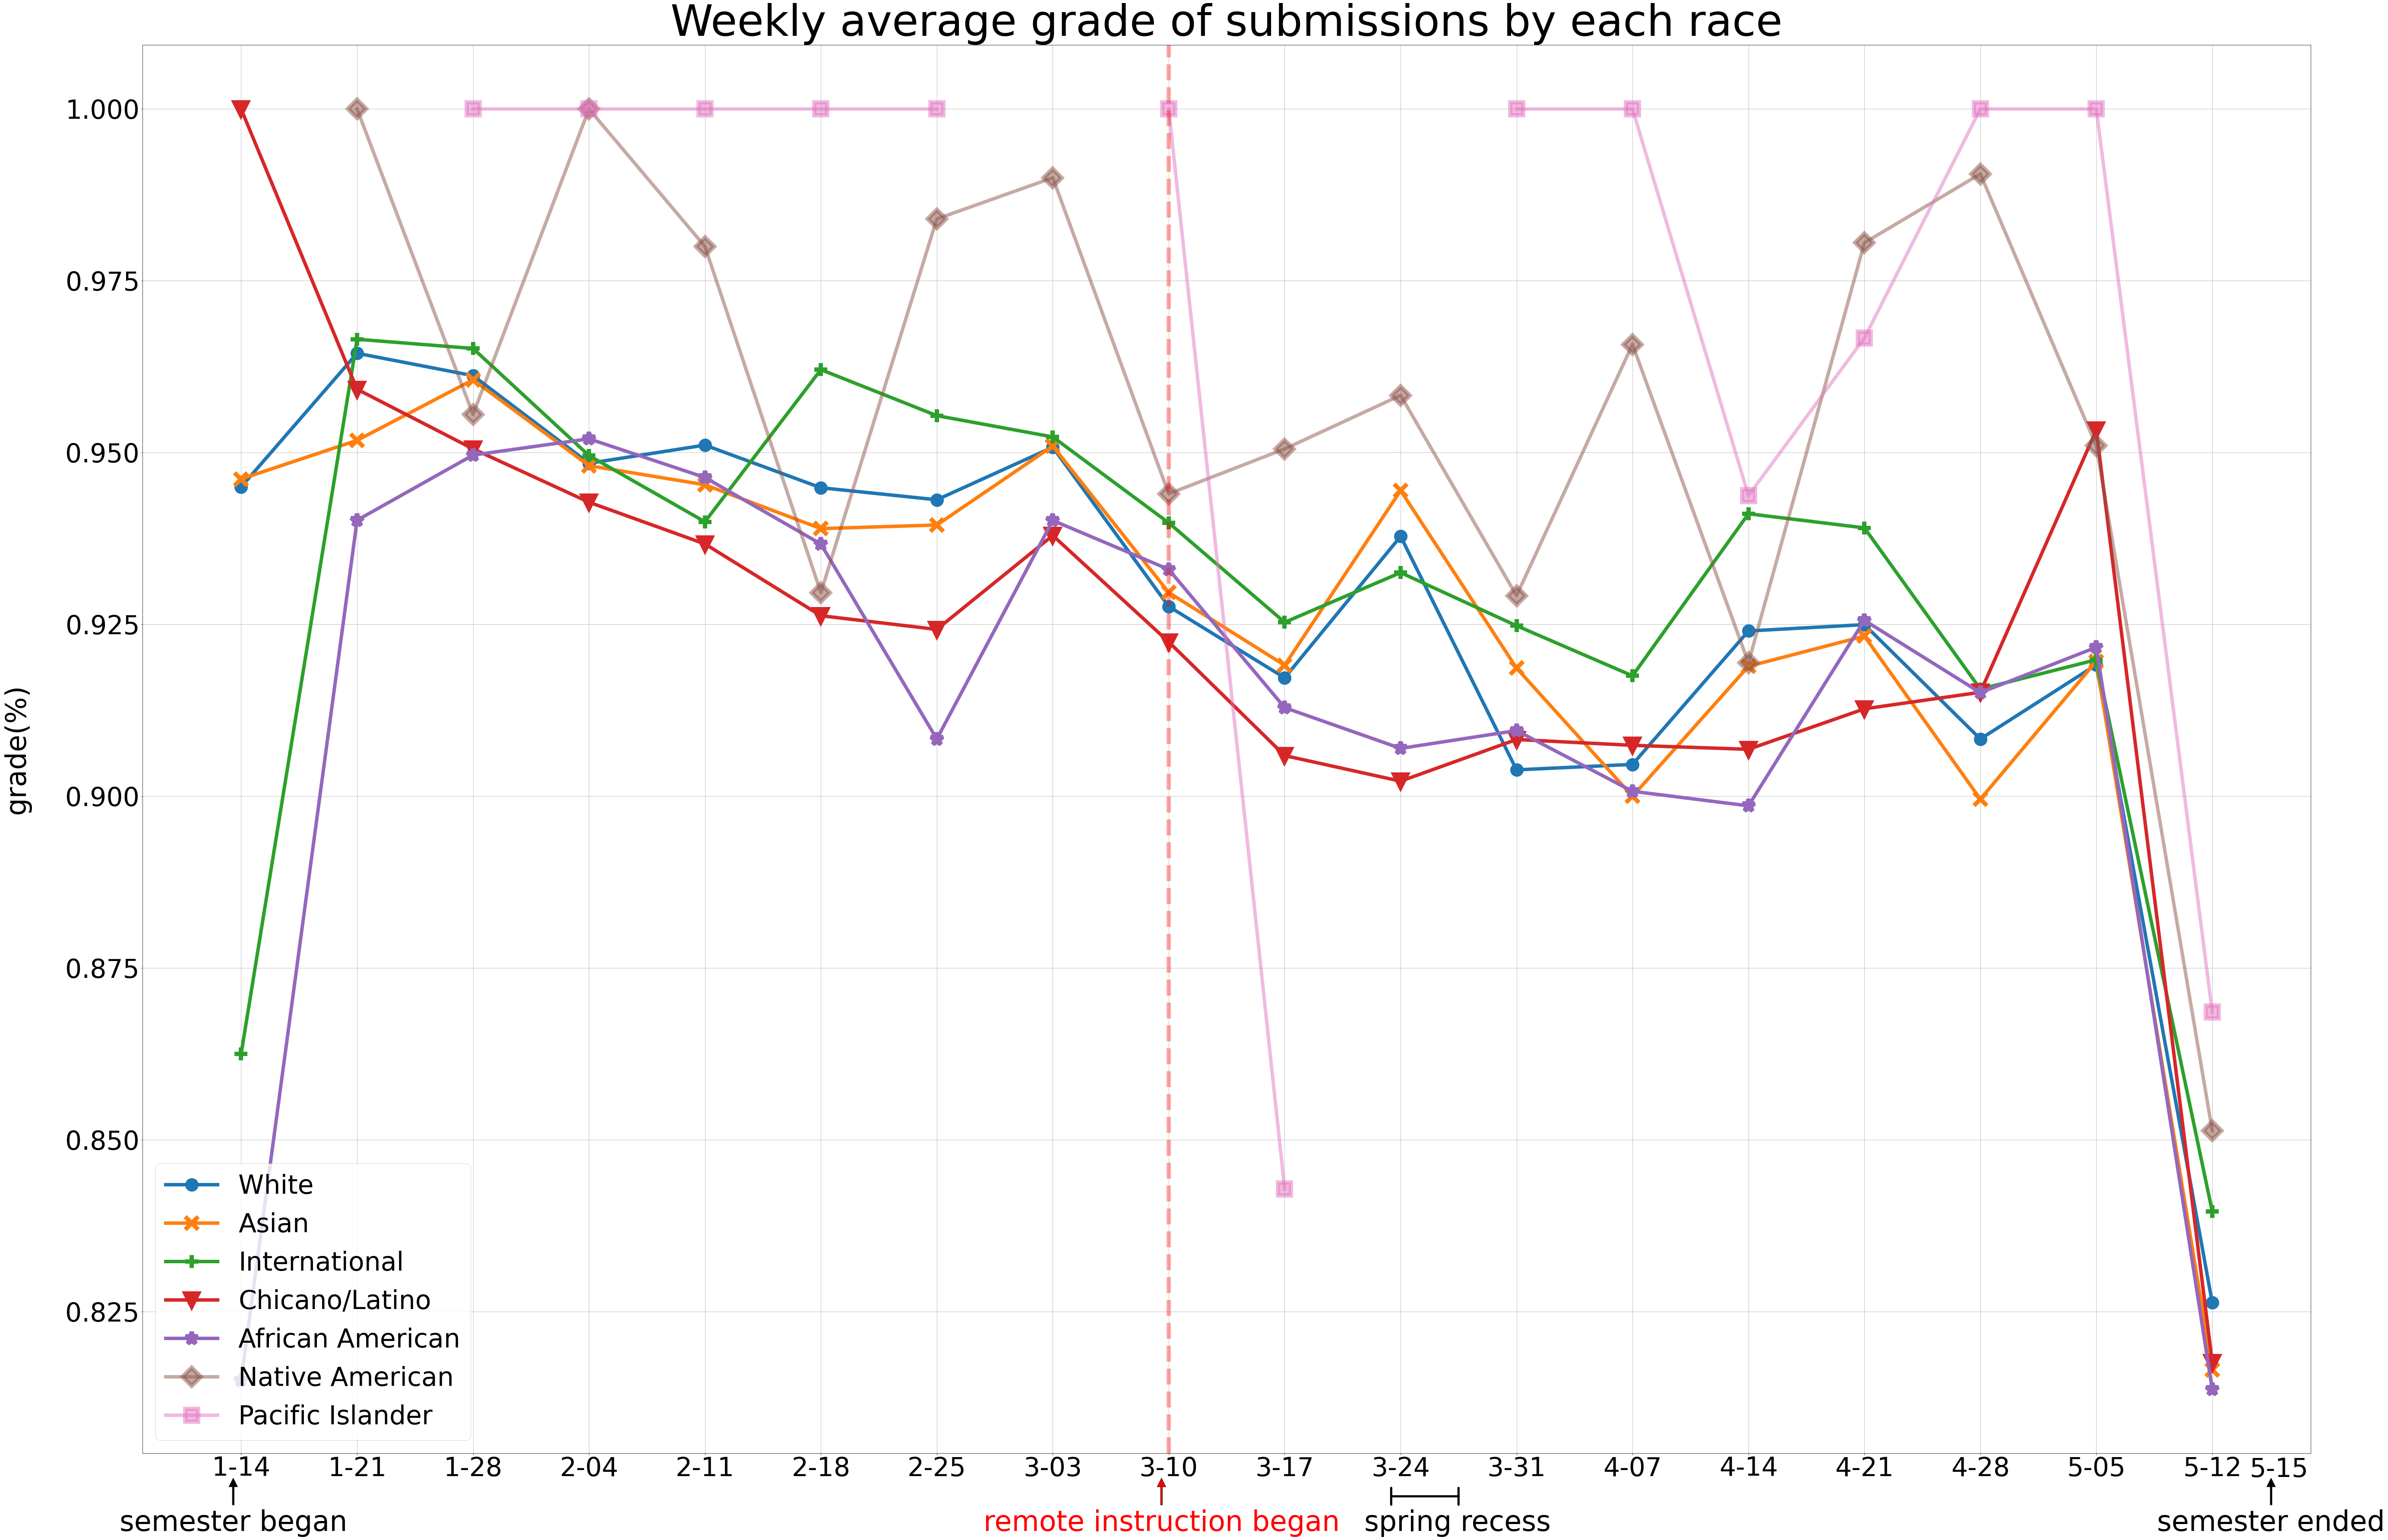

In [6]:
# plot all races together
f = open('/home/jenny/remote_learning_code_Spring_2017-2020/user_racial_groups.pkl', 'rb')
stu_race = pickle.load(f)
african = stu_race['African American']
asian = stu_race['Asian']
chicano = stu_race['Chicano/Latino']
inter = stu_race['International']
native = stu_race['Native American/Alaskan Native']
pacific = stu_race['Pacific Islander']
white = stu_race['White']
users = [white, asian, inter, chicano, african, native, pacific]

#submission1 = submission.loc[submission['user_id'].isin(stu_race[races[0]])]
group = submission.groupby('submitted_at_week')
gpa = [[],[],[],[],[],[],[]]
for i in group.groups.keys():
    each = group.get_group(i)
    for j in range(len(users)):
        race_users = each.loc[each['user_id'].isin(users[j])]
        average_gpa = np.mean(race_users['score'].tolist())
        gpa[j].append([i, average_gpa])
for i in range(len(users)):
    gpa[i] = sorted(gpa[i], key=lambda x: x[0])

gpa = np.array(gpa)
gpa = gpa[:, :, 1]
date = ['1-14', '1-21', '1-28', '2-04', '2-11', '2-18', '2-25', '3-03', '3-10', '3-17', '3-24', '3-31', '4-07', '4-14', '4-21', '4-28', '5-05', '5-12']
  
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
# set x-axis ticks
#myFmt = mdates.DateFormatter('%m-%d')
#ax.xaxis.set_major_formatter(myFmt)
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#ax.set_xlim([datetime.date(2020, 1, 10), datetime.date(2020, 5, 18)])

plt.plot(date, gpa[0], scalex=True, scaley=True, data=None, marker='o', markersize=30, linewidth=8, label='White')
plt.plot(date, gpa[1], scalex=True, scaley=True, data=None, marker='x', markersize=30, markeredgewidth=10, linewidth=8, label='Asian')
plt.plot(date, gpa[2], scalex=True, scaley=True, data=None, marker='+', markersize=30, markeredgewidth=10, linewidth=8, label='International')
plt.plot(date, gpa[3], scalex=True, scaley=True, data=None, marker='v', markersize=30, markeredgewidth=10, linewidth=8, label='Chicano/Latino')
plt.plot(date, gpa[4], scalex=True, scaley=True, data=None, marker='*', markersize=30, markeredgewidth=10, linewidth=8, label='African American')
plt.plot(date, gpa[5], scalex=True, scaley=True, data=None, marker='D', markersize=30, markeredgewidth=10, linewidth=8, label='Native American', alpha=0.5)
plt.plot(date, gpa[6], scalex=True, scaley=True, data=None, marker='s', markersize=30, markeredgewidth=10, linewidth=8, label='Pacific Islander', alpha=0.5) 

plt.legend(fontsize=60)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Weekly average grade of submissions by each race', fontsize=100)
#plt.xlabel('week', fontsize=65, labelpad=140)
plt.ylabel('grade(%)', fontsize=65, labelpad=80)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(210, -50), xytext=(210, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2360, -50), xytext=(2360, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2890, -100), xytext=(3050, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2830, -180), xycoords='axes points')
plt.axvline(x='3-10', color = 'r', linewidth=10, alpha=0.35, linestyle='--')

plt.show()